In [15]:
import pandas as pd
import mplfinance as mpf
from datetime import date
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
excel_file_path = './dataset/ABEV3_diario.xlsx'
ABEV3 = pd.read_excel(excel_file_path)
ABEV3 = ABEV3.set_index('Date')

In [11]:
# plot grafico diario 2017-2022
os.makedirs('./graphs/', exist_ok=True)
start_date = date(2017, 1, 1)
end_date = date(2023, 1, 1)

data = ABEV3[start_date:end_date]
mpf.plot(data,
        title='Gráfico de fechamento ABEV3 2017-2022',
        figratio=(20,12),
        type='line',
        volume=True,
        tight_layout=True,
        style='yahoo',
        savefig='./graphs/' + start_date.strftime("%Y-%m-%d") + '_' + end_date.strftime("%Y-%m-%d") + '.png')

In [14]:
ABEV3_Volume = go.Figure(data=[go.Scatter(x=ABEV3.index, y=ABEV3['Volume'], name= 'Volume')])

ABEV3_Volume.update_layout(
title = {
    'text': 'Gráfico de Volume ABEV3 2017-2022',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

ABEV3_Volume.show()

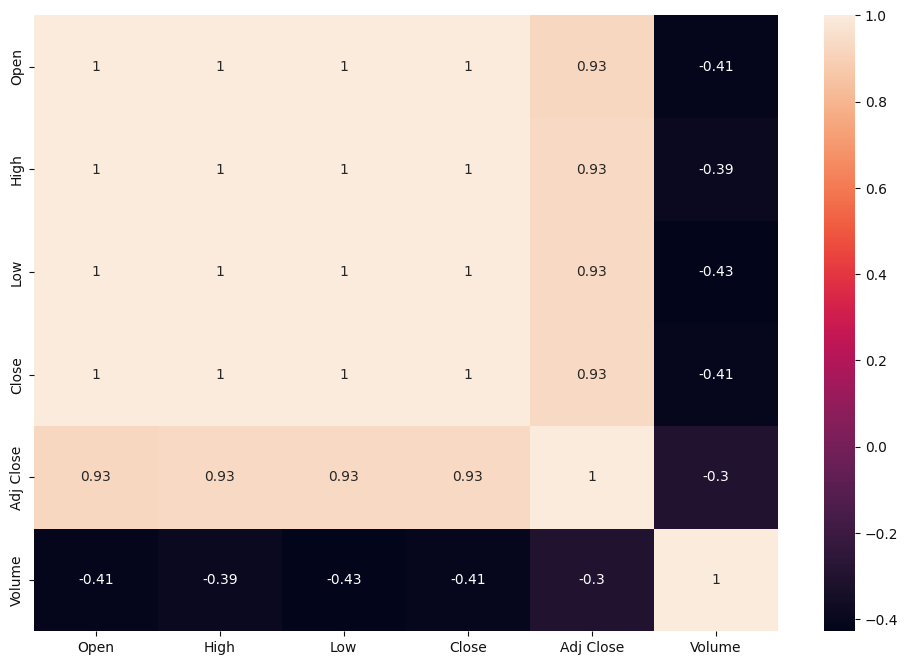

In [16]:
# matriz de correlaçao
mat = ABEV3.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(mat,annot=True)
plt.show()